In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Earthquake Intensity Map of Syria

Earthquake Intensity Data was obtained from version 15 from [USGS](https://earthquake.usgs.gov/earthquakes/map/?extent=31.98944,23.02734&extent=43.99281,49.74609&range=search&timeZone=utc&search=%7B%22name%22:%22Search%20Results%22,%22params%22:%7B%22starttime%22:%222023-02-01%2000:00:00%22,%22endtime%22:%222023-02-28%2023:59:59%22,%22maxlatitude%22:42.778,%22minlatitude%22:33.394,%22maxlongitude%22:47.813,%22minlongitude%22:24.961,%22minmagnitude%22:6,%22orderby%22:%22time%22%7D%7D) and was overlayed with shapefiles of Turkey admin 2 region taken from [UNOCHA](https://data.humdata.org/organization/ocha-turkey). This can be used as a baseline map upon which other indicators can be visualized. 

In [2]:
mi_feb20 = gpd.read_file(
    "../../data/earthquake-intensity/raw/ShakeMap Feb20 6p3/mi.shp"
)
mi_feb06_7p5 = gpd.read_file(
    "../../data/earthquake-intensity/raw/ShakeMap Feb06 7p5/mi.shp"
)
mi_feb06_7p8 = gpd.read_file(
    "../../data/earthquake-intensity/raw/ShakeMap Feb06 7p8/mi.shp"
)
mi_feb6_6p0_1 = gpd.read_file(
    "../../data/earthquake-intensity/raw/ShakeMap Feb06 6p0_1/mi.shp"
)
mi_feb6_6p0_2 = gpd.read_file(
    "../../data/earthquake-intensity/raw/ShakeMap Feb06 6p0_2/mi.shp"
)
mi_feb6_6p7 = gpd.read_file(
    "../../data/earthquake-intensity/raw/ShakeMap Feb06 6p7/mi.shp"
)

In [3]:
syria_adm4 = gpd.read_file(
    "../../data/shapefiles/syr_pplp_adm4_unocha_20210113/syr_pplp_adm4_unocha_20210113.json"
)

In [4]:
gdf_adm4_7p8 = mi_feb06_7p8[["PARAMVALUE", "geometry"]].sjoin(
    syria_adm4[["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN", "geometry"]]
)
gdf_adm4_7p5 = mi_feb06_7p5[["PARAMVALUE", "geometry"]].sjoin(
    syria_adm4[["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN", "geometry"]]
)
mi_feb6_6p0_1 = mi_feb6_6p0_1[["PARAMVALUE", "geometry"]].sjoin(
    syria_adm4[["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN", "geometry"]]
)
mi_feb6_6p0_2 = mi_feb6_6p0_2[["PARAMVALUE", "geometry"]].sjoin(
    syria_adm4[["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN", "geometry"]]
)
gdf_adm4_6p7 = mi_feb6_6p7[["PARAMVALUE", "geometry"]].sjoin(
    syria_adm4[["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN", "geometry"]]
)
gdf_adm4_feb20 = mi_feb20[["PARAMVALUE", "geometry"]].sjoin(
    syria_adm4[["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN", "geometry"]]
)

In [6]:
df_7p8 = (
    gdf_adm4_7p8.groupby(["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN"])
    .mean("PARAMVALUE")
    .reset_index()[["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN", "PARAMVALUE"]]
    .sort_values(by="PARAMVALUE", ascending=False)
)
df_7p5 = (
    gdf_adm4_7p5.groupby(["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN"])
    .mean("PARAMVALUE")
    .reset_index()[["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN", "PARAMVALUE"]]
    .sort_values(by="PARAMVALUE", ascending=False)
)
df_6p0_1 = (
    mi_feb6_6p0_1.groupby(["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN"])
    .mean("PARAMVALUE")
    .reset_index()[["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN", "PARAMVALUE"]]
    .sort_values(by="PARAMVALUE", ascending=False)
)
df_6p0_2 = (
    mi_feb6_6p0_2.groupby(["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN"])
    .mean("PARAMVALUE")
    .reset_index()[["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN", "PARAMVALUE"]]
    .sort_values(by="PARAMVALUE", ascending=False)
)
df_6p7 = (
    gdf_adm4_6p7.groupby(["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN"])
    .mean("PARAMVALUE")
    .reset_index()[["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN", "PARAMVALUE"]]
    .sort_values(by="PARAMVALUE", ascending=False)
)
df_feb20 = (
    gdf_adm4_feb20.groupby(["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN"])
    .mean("PARAMVALUE")
    .reset_index()[["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN", "PARAMVALUE"]]
    .sort_values(by="PARAMVALUE", ascending=False)
)

In [7]:
df_7p8.rename(columns={"PARAMVALUE": "mean_7p8"}, inplace=True)
df_7p5.rename(columns={"PARAMVALUE": "mean_7p5"}, inplace=True)
df_6p0_1.rename(columns={"PARAMVALUE": "mean_6p0_1"}, inplace=True)
df_6p0_2.rename(columns={"PARAMVALUE": "mean_6p0_2"}, inplace=True)
df_6p7.rename(columns={"PARAMVALUE": "mean_6p7"}, inplace=True)
df_feb20.rename(columns={"PARAMVALUE": "mean_feb20"}, inplace=True)

In [8]:
df = (
    syria_adm4[["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN"]]
    .merge(df_7p5, on=["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN"], how="left")
    .merge(df_7p8, on=["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN"], how="left")
    .merge(df_6p0_2, on=["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN"], how="left")
    .merge(df_6p0_1, on=["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN"], how="left")
    .merge(df_6p7, on=["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN"], how="left")
    .merge(df_feb20, on=["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN"], how="left")
)

In [9]:
df = (
    df.groupby(["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN"])
    .mean()
    .reset_index()
    .fillna(0)
)

In [10]:
# df['mean_intensity_feb6'] = df.apply(lambda x: mean([x['mean_7p5'], x['mean_7p8'], x['mean_6p0_1'], x['mean_6p0_2'], x['mean_6p7']]), axis=1)
df["max_intensity_feb06"] = df.apply(
    lambda x: max(
        x["mean_7p5"], x["mean_7p8"], x["mean_6p0_1"], x["mean_6p0_2"], x["mean_6p7"]
    ),
    axis=1,
)

In [11]:
df[
    ["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN", "max_intensity_feb06", "mean_feb20"]
].to_csv("../../data/earthquake-intensity/turkiye_adm2_earthquake_intensity.csv")

In [12]:
gdf = syria_adm4.merge(df, on=["ADM4_EN", "ADM3_EN", "ADM2_EN", "ADM1_EN"])

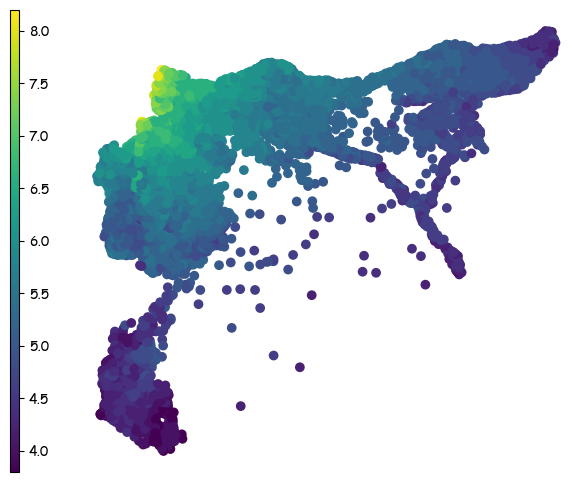

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.rcParams["font.family"] = "cursive"

gdf.plot(column="max_intensity_feb06", cmap="viridis", ax=ax)
# turkey_adm2.boundary.plot(ax=ax, edgecolor = '#D3D3D3', linewidth=0.5)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

vmin = gdf["max_intensity_feb06"].min()
vmax = gdf["max_intensity_feb06"].max()

sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=vmin, vmax=vmax))


divider = make_axes_locatable(ax)
dvider_kwargs = dict(position="left", size="1.5%", pad=0)
fig.colorbar(
    sm,
    cax=divider.append_axes(**dvider_kwargs),
    # format = matplotlib.ticker.FuncFormatter(lambda x, pos: ''),
    # ticks = matplotlib.ticker.FixedLocator([])
)

# plt.savefig('../images/final_check_in/01_earthquake_intensity_feb6.png')